# CIFAR-10 Training

Colab setup, skip if running locally.

In [ ]:
# Google mount, skip if running locally.
from google.colab import drive
drive.mount('/content/drive')

In [12]:
# Google colab setup, skip if running locally.
import sys
from os.path import dirname

# Path to google drive
basepath='/content/drive/My Drive/train-using-sion'
sys.path.append(basepath)

Basic training using cpu

In [1]:
import logging_utils
from pytorch_training import train

LOGGER = logging_utils.initialize_logger(True)

In [2]:
model, testset = train(config={"test_mode": True, "epochs": 10, "cpu": True})

Config: {'test_mode': True, 'epochs': 10, 'cpu': True, 'dataset': 'cifar', 'ready': False, 'disk_source': '', 's3_source': '', 's3_train': '', 's3_test': '', 'loader': '', 'model': '', 'batch': 64, 'minibatch': 16, 'accuracy': 1.0, 'benchmark': False, 'workers': 0, 'output': '', 'prefix': ''}
Files already downloaded and verified
Initializing BasicCNN model
Running training with the 
2022-06-13 04:04:45,897 — default — INFO — Pretrained top-1 accuracy: 9.375, top-5 accuracy 51.562
2022-06-13 04:04:46,049 — default — INFO — [Epoch   1] Training for CIFAR10_DatasetBuildin with 64 samples, data loading time 0.059 sec, training time 0.150 sec, top accuracies 4.688, 34.375.
2022-06-13 04:04:46,125 — default — INFO — [Epoch   1] Validation top-1 accuracy: 10.938, top-5 accuracy 46.875
2022-06-13 04:04:46,290 — default — INFO — [Epoch   2] Training for CIFAR10_DatasetBuildin with 64 samples, data loading time 0.185 sec, training time 0.313 sec, top accuracies 4.688, 34.375.
2022-06-13 04:04:4

Show training result.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


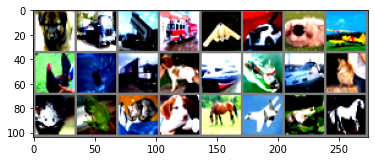

Labels:  tensor([5, 9, 9, 9, 0, 1, 5, 0, 2, 4, 9, 5, 8, 8, 8, 3, 2, 6, 3, 5, 7, 0, 6, 7])
Labels:  dog   truck truck truck plane car   dog   plane bird  deer  truck dog   ship  ship  ship  cat   bird  frog  cat   dog   horse plane frog  horse

Predictions:  tensor([7, 9, 9, 0, 3, 3, 7, 9, 4, 9, 9, 1, 9, 7, 9, 3, 1, 7, 1, 7, 7, 9, 1, 1])
Predictions:  horse truck truck plane cat   cat   horse truck deer  truck truck car   truck horse truck cat   car   horse car   horse horse truck car   car  

Predicted 5/24 correctly. Accuracy: 21%.


In [3]:
from torch.utils.data import DataLoader
from utils import predict_and_display

num_record = 24
test_dataloader = DataLoader(testset, batch_size=num_record, shuffle=True)
images, labels = next(iter(test_dataloader))

predict_and_display(model, images, labels)